In [27]:
import pandas as pd

%matplotlib inline

In [28]:
dfMaster = pd.read_csv('../data/dayByDayStandings2015.csv')
dfMaster.fillna(0, inplace=True)
dfMaster['date'] = pd.to_datetime(dfMaster['date'])
dfMaster['date'] = dfMaster['date'].apply(pd.datetools.normalize_date)
dfMaster.set_index(['division', 'date'], inplace=True)
dfMaster = dfMaster[['Tm', 'W', 'L', 'GB', 'RS', 'RA', 'W-L%', 'pythW-L%']]

In [29]:
dfMaster.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5460 entries, (AL East, 2015-04-05 00:00:00) to (NL West, 2015-10-03 00:00:00)
Data columns (total 8 columns):
Tm          5460 non-null object
W           5460 non-null int64
L           5460 non-null int64
GB          5460 non-null object
RS          5460 non-null int64
RA          5460 non-null int64
W-L%        5460 non-null float64
pythW-L%    5460 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 358.8+ KB


In [30]:
dfMaster.tail()

Tm   W   L    GB   RS   RA   W-L%  pythW-L%
division date                                                    
NL West  2015-10-03  LAD  91  70    --  661  592  0.565     0.550
         2015-10-03  SFG  84  77   7.0  693  620  0.522     0.551
         2015-10-03  ARI  78  83  13.0  715  710  0.484     0.503
         2015-10-03  SDP  74  87  17.0  647  725  0.460     0.448
         2015-10-03  COL  67  94  24.0  730  841  0.416     0.436

In [52]:
dfALCentral = dfMaster.ix['AL Central', ['Tm', 'GB']]

In [53]:
dfALCentral.replace({'--': 0}, axis=1, inplace=True)
dfALCentral['GB'] = dfALCentral['GB'].astype(float)

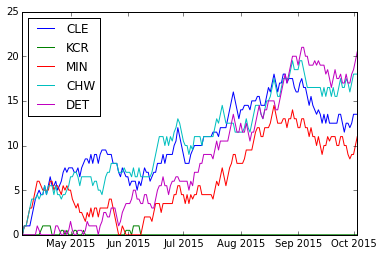

In [69]:
import matplotlib.pyplot as plt

cle = dfALCentral[dfALCentral.Tm == 'CLE']
kcr = dfALCentral[dfALCentral.Tm == 'KCR']
minn = dfALCentral[dfALCentral.Tm == 'MIN']
chw = dfALCentral[dfALCentral.Tm == 'CHW']
det = dfALCentral[dfALCentral.Tm == 'DET']
plt.figure()
plt.plot(cle.index.values, cle['GB'], label='CLE')
plt.plot(kcr.index.values, kcr['GB'], label='KCR')
plt.plot(minn.index.values, minn['GB'], label='MIN')
plt.plot(chw.index.values, chw['GB'], label='CHW')
plt.plot(det.index.values, det['GB'], label='DET')
plt.legend(loc='best')
plt.show()